# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### For comparison, Black-Scholes analytic solution:

In [2]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


### Esercizio 03.1 - Soluzione proposta

Nell'esercizio proposto si è simulata un'_opzione europea_ di _call_ e di _put_, ossia un contratto in cui il _writer_ dell'opzione garantisce all'_holder_ il diritto di comprare (_opzione di call_) o di vendere (_opzione di put_) al tempo $T$ e al prezzo $K$ un certo _asset_, che ha prezzo istantaneo $S(t)$. L'_holder_ può comprare o vendere in base al profitto, definito come il massimo tra $0$ e $S(T) - K$ per una _call_ e come il massimo tra $0$ e $K - S(T)$ per una _put_: se $S(T) > K $, all'_holder_ conviene comprare, altrimenti è conveniente vendere.

Dal punto di vista computazionale, l'_opzione europea_ è descritta dalla teoria di Black e Scholes come un moto geometrico Browniano, ossia un processo stocastico con incrementi indipendenti, distribuiti gaussianamente intorno a $0$, che può presentare _drift_ $r$ e _coefficiente di diffusione_ $\sigma^2$. 

Per simulare direttamente il moto Browniano, si è estratto un numero pseudocasuale $W(T)$ distribuito secondo una Gaussiana con media $0$ e deviazione standard $T$; si è dunque calcolato il prezzo dell'_asset_ al tempo $T$:
$$S(T) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)T+\sigma W(T)\right]$$

e si sono stimate $C[S(0),0]$ e $P[S(0),0]$, tenendo conto anche del tasso di interesse:
- $C[S(0), 0] = \max{[ 0, (S(T) - K) e^{-rT} ] }$
- $P[S(0), 0] = \max{[ 0, (K - S(T) ) e^{-rT} ] }$

I risultati della simulazione, iterata per $M=10000$ volte calcolando la media a blocchi di $C[S(0), 0]$ e $P[S(0), 0]$ dirette, sono riportati nei grafici.

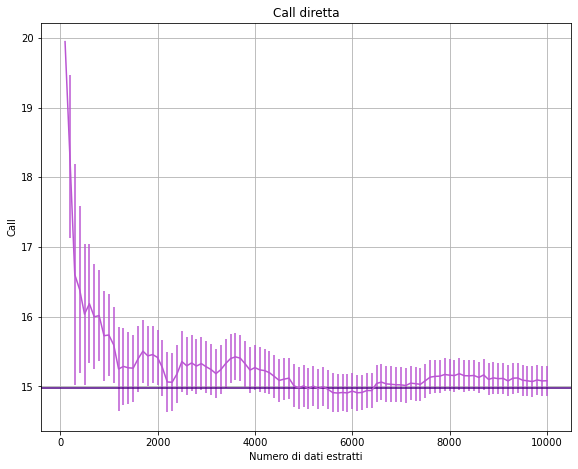

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es3/diretto_call') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
        err_prog = [float(line.split()[2]) for line in lines]
        
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, yerr=err_prog, color = 'mediumorchid')
plt.axhline(14.975790778311286, color='indigo') # horizontal
plt.xlabel('Numero di dati estratti')
plt.ylabel('Call')
plt.title('Call diretta')
plt.grid(True)
plt.show()

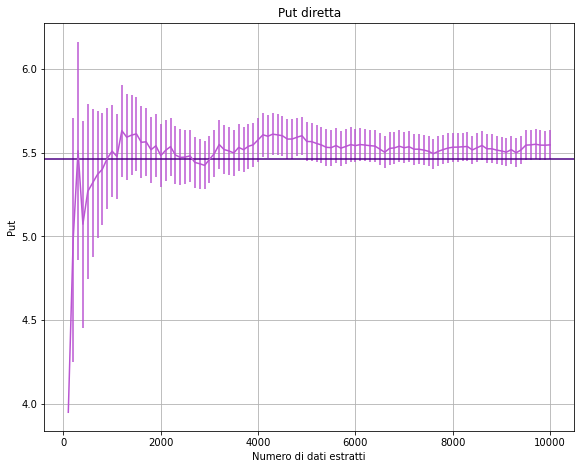

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es3/diretto_put') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
        err_prog = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, yerr=err_prog, color = 'mediumorchid')
plt.axhline(5.4595325819072364, color='indigo')
plt.xlabel('Numero di dati estratti')
plt.ylabel('Put')
plt.title('Put diretta')
plt.grid(True)
plt.show()

Si osserva che i dati simulati risultano compatibili con la soluzione analitica di Black e Scholes.

Per simulare in modo discreto il moto Browniano, si è estratto un numero pseudocasuale $Z_i$ distribuito secondo una Gaussiana con media $0$ e deviazione standard $1$; si è dunque calcolato in modo ricorsivo il prezzo dell'_asset_ al tempo $t_{i+1}$:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
Il processo è stato iterato suddividendo $[0, T]$ in $100$ intervalli, definendo dunque $t_{i+1} = t_i + \displaystyle{\frac{1}{100}}$. 

Giunti al tempo $T$, si sono dunque stimate $C[S(0),0]$ e $P[S(0),0]$ in modo analogo a quanto fatto per il metodo diretto.

I risultati della simulazione, iterata per $M=10000$ volte calcolando la media a blocchi di $C[S(0), 0]$ e $P[S(0), 0]$ discrete, sono riportati nei grafici.

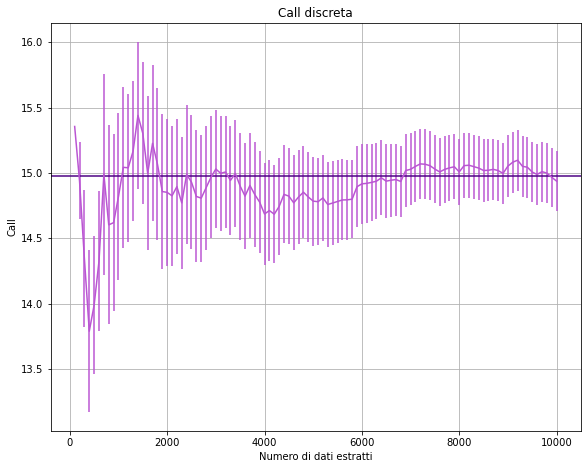

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es3/discreto_call') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
        err_prog = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, yerr=err_prog, color = 'mediumorchid')
plt.axhline(14.975790778311286, color='indigo')
plt.xlabel('Numero di dati estratti')
plt.ylabel('Call')
plt.title('Call discreta')
plt.grid(True)
plt.show()

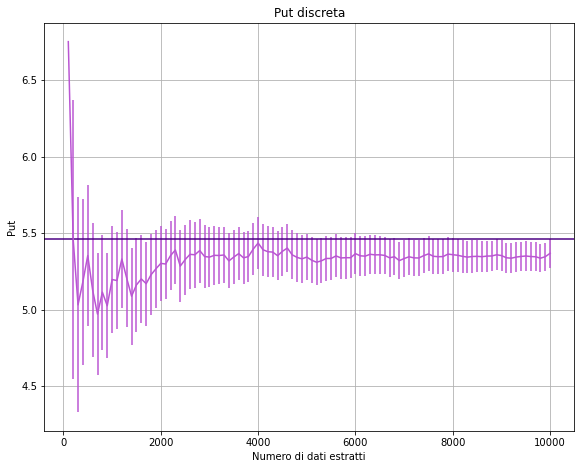

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es3/discreto_put') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
        err_prog = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, yerr=err_prog, color = 'mediumorchid')
plt.axhline(5.4595325819072364, color='indigo')
plt.xlabel('Numero di dati estratti')
plt.ylabel('Put')
plt.title('Put discreta')
plt.grid(True)
plt.show()

Anche per _call_ e _put_ discrete si osserva la compatibilità con la soluzione analitica.